In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import re

#### Import the data and get a high-level picture

In [8]:
df = pd.read_csv('sales.csv')
df.head()

,order_id,name,ordered_at,price,quantity,line_total
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,$3.50,3,$10.50
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,$3.50,1,$3.50
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,$2.50,2,$5.00
3,10001,NaN,2018-01-01 12:14:54,$1.50,1,$1.50
4,10001,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:54,$3.50,1,$3.50


In [9]:
df.shape

(29922, 6)

In [10]:
df.dtypes

order_id       int64
name          object
ordered_at    object
price         object
quantity       int64
line_total    object
dtype: object

#### TODO: Fix column datatypes

Change ordered_at to datetime

Change price and line_total to float

In [11]:
# Change to datetime datatype
df['ordered_at']= pd.to_datetime(df['ordered_at'])

In [12]:
# Remove the dollar signs
df['price'] = df['price'].str.replace('$', '')

# Change to float datatype
df["price"] = df['price'].astype('float')

In [13]:
# Remove the dollar signs
df['line_total'] = df['line_total'].str.replace('$', '')

# Change to float datatype
df["line_total"] = df['line_total'].astype('float')

In [14]:
df.dtypes

order_id               int64
name                  object
ordered_at    datetime64[ns]
price                float64
quantity               int64
line_total           float64
dtype: object

#### TODO: drop if duplicated or null

In [15]:
# I think this shows us how many duplicates we have? - It went from 500+ to 0 after I made my change
df[df.duplicated()].shape[0]

538

In [16]:
# Drop all duplicate order_ids
df.drop_duplicates(subset ="order_id", keep = False, inplace = True)

In [17]:
# Show us what has null entries
df.isnull().sum()

order_id        0
name          100
ordered_at      0
price           0
quantity        0
line_total      0
dtype: int64

In [18]:
# Display the head of null entries found in name
df[df['name'].isnull()].head()

,order_id,name,ordered_at,price,quantity,line_total
125,10043,NaN,2018-01-02 10:17:54,4.0,2,8.0
332,10112,NaN,2018-01-03 20:58:55,3.0,1,3.0
378,10129,NaN,2018-01-04 02:44:47,3.5,1,3.5
561,10186,NaN,2018-01-05 01:26:32,2.0,1,2.0
1659,10550,NaN,2018-01-12 09:11:21,1.5,1,1.5


In [19]:
# Remove all null values
df = df.dropna(axis = 0, how ='any')

#### Sanity check for value ranges and to check assumptions

In [20]:
df[(df['price'] * df['quantity']) != df['line_total']].shape[0]

3

In [21]:
df[df['line_total'] < 0].shape[0]

25

#### TODO: 
Set line_total = price * quantity if different
Remove if line total < 0

In [22]:
line_total = df['line_total']

In [23]:
# Set line_total = price * quantity
df.assign(line_total=df['price'] * df['quantity'])

,order_id,name,ordered_at,price,quantity,line_total
8,10003,"""ICE CREAM"" Matcha",2018-01-01 12:49:35,1.5,3,4.5
35,10010,"""ICE CREAM"" Vanilla Bean",2018-01-01 16:14:45,1.5,2,3.0
44,10013,"""ICE CREAM"" Dulce De Leche",2018-01-01 19:00:00,1.5,1,1.5
45,10014,"""ICE CREAM"" Rocky Road",2018-01-01 19:18:31,3.5,3,10.5
60,10019,"""ICE CREAM"" Wildberry",2018-01-01 22:41:56,1.5,3,4.5
68,10022,"""SORBET"" Lychee",2018-01-02 00:38:37,3.0,2,6.0
69,10023,"""BEVERAGE"" Tea",2018-01-02 01:28:12,4.0,1,4.0
70,10024,"""ICE CREAM"" Mint Chip",2018-01-02 02:05:29,1.5,2,3.0
118,10040,"""BEVERAGE"" Espresso",2018-01-02 09:27:32,2.5,3,7.5
124,10042,"""CONE"" Waffle Cone",2018-01-02 10:13:39,4.0,3,12.0


In [24]:
# Remove line_totals that are less than 0
df['line_total'] = df[df['line_total'] > 0]['line_total']
df.dropna()

,order_id,name,ordered_at,price,quantity,line_total
8,10003,"""ICE CREAM"" Matcha",2018-01-01 12:49:35,1.5,3,4.5
35,10010,"""ICE CREAM"" Vanilla Bean",2018-01-01 16:14:45,1.5,2,3.0
44,10013,"""ICE CREAM"" Dulce De Leche",2018-01-01 19:00:00,1.5,1,1.5
45,10014,"""ICE CREAM"" Rocky Road",2018-01-01 19:18:31,3.5,3,10.5
60,10019,"""ICE CREAM"" Wildberry",2018-01-01 22:41:56,1.5,3,4.5
68,10022,"""SORBET"" Lychee",2018-01-02 00:38:37,3.0,2,5.0
69,10023,"""BEVERAGE"" Tea",2018-01-02 01:28:12,4.0,1,4.0
70,10024,"""ICE CREAM"" Mint Chip",2018-01-02 02:05:29,1.5,2,3.0
118,10040,"""BEVERAGE"" Espresso",2018-01-02 09:27:32,2.5,3,7.5
124,10042,"""CONE"" Waffle Cone",2018-01-02 10:13:39,4.0,3,12.0


In [27]:
df.describe()

,order_id,price,quantity,line_total
count,1965.000000,1965.000000,1965.000000,1940.000000
mean,15002.627990,2.456997,1.984733,5.030670
std,2872.110086,1.206761,0.819052,3.116603
min,10003.000000,-4.000000,1.000000,0.500000
25%,12520.000000,1.500000,1.000000,2.500000
50%,15061.000000,2.500000,2.000000,4.500000
75%,17493.000000,3.500000,3.000000,7.500000
max,19999.000000,4.000000,3.000000,12.000000


#### TODO: Get value between "" in name and put it in category column

In [49]:
# Use regular expression to extract what is between the "" and put it into a category column
df['category'] = df['name'].str.extract(pat = '"(.*?)"', expand=True)

# Cut this extracted part out of the name
df['name'] = df['name'].str.replace('"(.*?)"', '')

In [51]:
df.head()

,order_id,name,ordered_at,price,quantity,line_total,category
8,10003,Matcha,2018-01-01 12:49:35,1.5,3,4.5,ICE CREAM
35,10010,Vanilla Bean,2018-01-01 16:14:45,1.5,2,3.0,ICE CREAM
44,10013,Dulce De Leche,2018-01-01 19:00:00,1.5,1,1.5,ICE CREAM
45,10014,Rocky Road,2018-01-01 19:18:31,3.5,3,10.5,ICE CREAM
60,10019,Wildberry,2018-01-01 22:41:56,1.5,3,4.5,ICE CREAM


#### Analysis, finally!

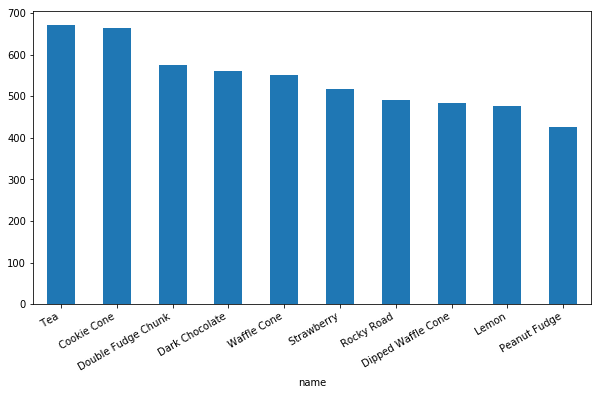

In [53]:
f, ax = plt.subplots(figsize=(10, 6))
df.groupby('name')['line_total'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
f.autofmt_xdate()
plt.show()